In [1]:
#list of NCBI accession numbers extracted from the NCBI website for genomes of 
accs=open("./data/hosts/marine_host_genome_accs.txt").readlines()

In [20]:
from Bio import Entrez
from Bio import SeqIO
import re
import os
import subprocess

Entrez.email="julia.brown@einstein.yu.edu"
for a in accs:
    a=a.replace("\n","")
    handle=Entrez.efetch(db="nucleotide", id=str(a), rettype="gbwithparts", retmode="text")
    filename="./data/hosts/"+a+".gbk"
    out=open(filename, "w")
    out.write(handle.read())
    out.close()
    handle.close()
    SeqIO.convert("./data/hosts/"+a+".gbk","gb","./data/hosts/"+a+".fasta","fasta")
    print(a+" converted")

NC_007205.1 converted
NC_015380.1 converted
NC_005071.1 converted
NC_005072.1 converted
NC_007335.2 converted
NC_009840.1 converted
NZ_CP007754.1 converted
NC_008819.1 converted
CP000951.1 converted
BX548020.1 converted
NC_019702.1 converted
NC_009481.1 converted
NC_018632.1 converted
NZ_CP010912.1 converted
CP002339.1 converted


In [21]:
vibs=glob.glob("./data/hosts/*prod.gbk")

for v in vibs:
    gbk_to_fasta(v, v.replace("_contigs_prod.gbk",".fasta"))

In [2]:
from tRNA_functions import *
import glob

fastas=glob.glob("./data/hosts/*.fasta")

for f in fastas:
    run_trna_scan(f, f.replace(".fasta",".trna"))

tRNA scan of ./data/hosts/10N.286.45.B12.fasta is done!
tRNA scan of ./data/hosts/10N.286.45.B8.fasta is done!
tRNA scan of ./data/hosts/10N.286.45.C3.fasta is done!
tRNA scan of ./data/hosts/10N.286.45.E12.fasta is done!
tRNA scan of ./data/hosts/10N.286.49.A5.fasta is done!
tRNA scan of ./data/hosts/10N.286.52.F6.fasta is done!
tRNA scan of ./data/hosts/10N.286.54.E11.fasta is done!
tRNA scan of ./data/hosts/BX548020.1.fasta is done!
tRNA scan of ./data/hosts/CP000951.1.fasta is done!
tRNA scan of ./data/hosts/CP002339.1.fasta is done!
tRNA scan of ./data/hosts/NC_005071.1.fasta is done!
tRNA scan of ./data/hosts/NC_005072.1.fasta is done!
tRNA scan of ./data/hosts/NC_007205.1.fasta is done!
tRNA scan of ./data/hosts/NC_007335.2.fasta is done!
tRNA scan of ./data/hosts/NC_008819.1.fasta is done!
tRNA scan of ./data/hosts/NC_009481.1.fasta is done!
tRNA scan of ./data/hosts/NC_009840.1.fasta is done!
tRNA scan of ./data/hosts/NC_015380.1.fasta is done!
tRNA scan of ./data/hosts/NC_018

In [1]:
import glob
fastas=glob.glob("./data/hosts/*.fasta")

In [2]:
from tRNA_functions import *

def extract_org_names(gbk):
    handle=SeqIO.parse(gbk,"genbank")
    count=0
    for g in handle:
        return g.annotations['source']

trna_files=glob.glob("./data/hosts/*.trna")
gbk_files=glob.glob("./data/hosts/*.gbk")
hosts=[]
names=[]

for i in range(0,len(trna_files)):
    host=trna_files[i].split("/")[3].replace(".trna","")
    hosts.append(host)
    if len(extract_org_names(gbk_files[i]))==0:
        org_name="Vibrio "+host
    else:
        org_name=extract_org_names(gbk_files[i])
    print org_name
    names.append(org_name)



Vibrio 10N.286.45.B12
Vibrio 10N.286.45.B8
Vibrio 10N.286.45.C3
Vibrio 10N.286.45.E12
Vibrio 10N.286.49.A5
Vibrio 10N.286.52.F6
Vibrio 10N.286.54.E11
Synechococcus sp. WH 8102
Synechococcus sp. PCC 7002
Alteromonas sp. SN2
Prochlorococcus marinus str. MIT 9313
Prochlorococcus marinus subsp. pastoris str. CCMP1986
Candidatus Pelagibacter ubique HTCC1062
Prochlorococcus marinus str. NATL2A
Prochlorococcus marinus str. NATL1A
Synechococcus sp. WH 7803
Prochlorococcus marinus str. MIT 9215
Candidatus Pelagibacter sp. IMCC9063
Alteromonas macleodii ATCC 27126
Synechococcus sp. PCC 7502
Prochlorococcus sp. MIT 0801
Alteromonas australica


In [3]:
%load_ext rpy2.ipython
%R library(dplyr); library(ggplot2); library(magrittr); library(reshape)


Attaching package: ‘dplyr’

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename



In [4]:
%%R -i trna_files -i hosts -i names

codons<-read.table("./data/codon_list.txt", header=FALSE)
print(head(codons))
colnames(codons)[2]<-"V6"

for (i in seq(1,length(trna_files))){
    trna_file=trna_files[i]
    host=hosts[i]
    host_name=names[i]
    if (file.info(trna_file)$size>0 & file.exists(trna_file)){
    trna<-read.table(trna_file, skip=3, header=FALSE,sep="\t")
    trna%>%group_by(V6)%>%summarise(count=n())->trna
    colnames(trna)[2]<-host_name
    codons<-merge(codons, trna, by="V6", all.x=TRUE, all.y=TRUE)
}}

  V1  V2
1  1 TTT
2  2 TTC
3  3 TTA
4  4 TTG
5  5 TCT
6  6 TCC


In [5]:
%%R 
codons$V1<-NULL
codons[is.na(codons)]<-0
rs_codons<-melt(codons)%>%filter(value!=0)%>%filter(variable!="Vibrio 10N.286.45.E12")
head(rs_codons)

Using V6 as id variables
   V6              variable value
1 AAC Vibrio 10N.286.45.B12     4
2 ACA Vibrio 10N.286.45.B12     4
3 ACC Vibrio 10N.286.45.B12     2
4 AGA Vibrio 10N.286.45.B12     1
5 AGC Vibrio 10N.286.45.B12     2
6 ATC Vibrio 10N.286.45.B12     1


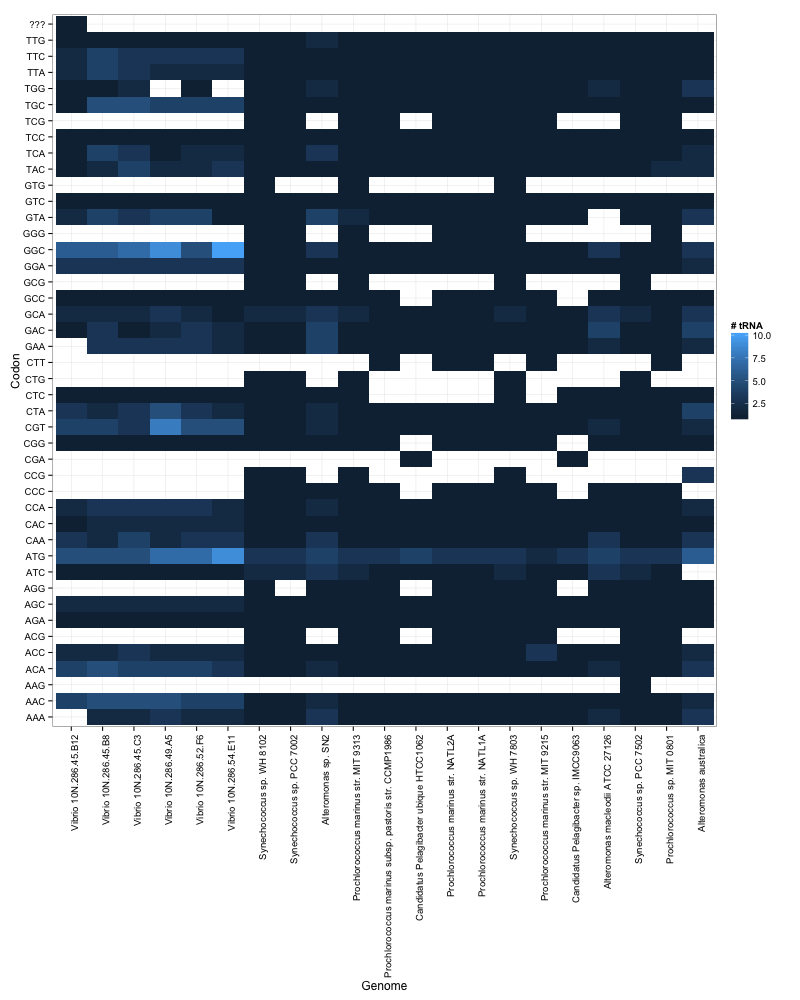

In [6]:
%%R -w=800 -h=1000
ggplot(rs_codons, aes(variable, V6))+geom_tile(aes(fill=value))+scale_fill_gradient(limits=c(1,10))+theme_bw()->plot1
plot1<-plot1+theme(axis.text.x = element_text(angle = 90, hjust = 1))+labs(x="Genome", y="Codon", fill="# tRNA")
plot(plot1)

In [21]:
%%R
host<-vector()
for (i in rs_codons$variable){
    m<-strsplit(i, " ")
    host<-c(host, (unlist(m)[1]))
    }


rs_codons<-cbind.data.frame(rs_codons, host)
head(rs_codons)



   V6              variable value   host
1 AAC Vibrio 10N.286.45.B12     4 Vibrio
2 ACA Vibrio 10N.286.45.B12     4 Vibrio
3 ACC Vibrio 10N.286.45.B12     2 Vibrio
4 AGA Vibrio 10N.286.45.B12     1 Vibrio
5 AGC Vibrio 10N.286.45.B12     2 Vibrio
6 ATC Vibrio 10N.286.45.B12     1 Vibrio


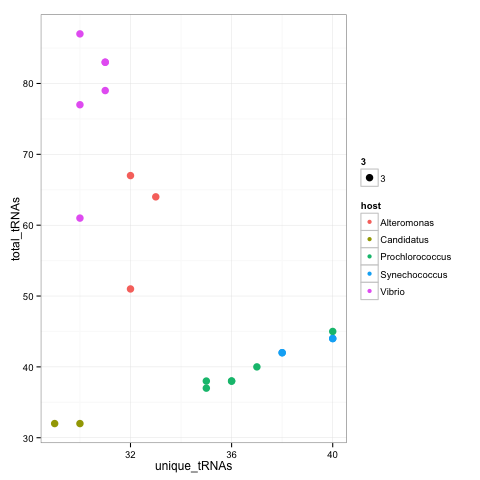

In [32]:
%%R
rs_codons%>%group_by(variable, host)%>%summarise(unique_tRNAs=n(), total_tRNAs=sum(value))->summary
ggplot(summary, aes(unique_tRNAs, total_tRNAs))+geom_point(aes(colour=host, cex=3))+theme_bw()